# Sentiment Analysis using VADER and RoBERTa

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #progress bar
nltk.download('punkt') # download punkt for tokeniser
nltk.download('averaged_perceptron_tagger') #download for POS tagging
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tisha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Tisha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Tisha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tisha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Context
This publicly available dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Contents
Reviews.csv: Pulled from the corresponding SQLite table named Reviews in database.sqlite



In [3]:

# Read data
df = pd.read_csv('Reviewsam.csv')
print(df.shape)

(568454, 10)


In [4]:
df.head() #1 to 5 star review

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df=df.head(500) #taking only 500 samples for now

## EDA

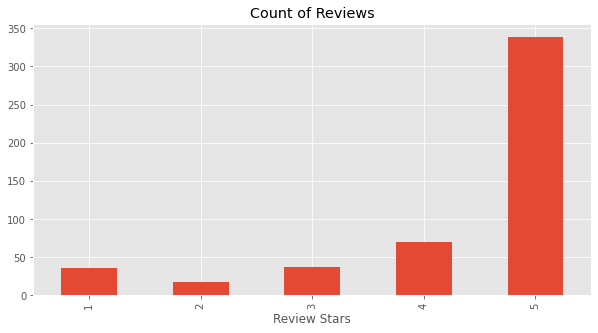

In [6]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## NLTK


In [7]:
ex=df['Text'][55]
print(ex) #should be positive sentiment

We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much.


Tokenise it

In [8]:
tokens = nltk.word_tokenize(ex)
tokens[:]


['We',
 'roast',
 'these',
 'in',
 'a',
 'large',
 'cast',
 'iron',
 'pan',
 'on',
 'the',
 'grill',
 '(',
 'about',
 '1/3',
 'of',
 'the',
 'bag',
 'at',
 'a',
 'time',
 ')',
 '.',
 'The',
 'smell',
 'is',
 'wonderful',
 'and',
 'the',
 'roasted',
 'beans',
 'taste',
 'delicious',
 'too',
 '.',
 'More',
 'importantly',
 ',',
 'the',
 'coffee',
 'is',
 'smooth',
 ';',
 'no',
 'bitter',
 'aftertaste',
 '.',
 'On',
 'numerous',
 'occasions',
 ',',
 'we',
 "'ve",
 'had',
 'to',
 'send',
 'the',
 'roasted',
 'beans',
 'home',
 'with',
 'friends',
 'because',
 'they',
 'like',
 'it',
 'so',
 'much',
 '.']

Do Part of Speech Tagging

In [9]:
tagged=nltk.pos_tag(tokens)

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  roast/VBP
  these/DT
  in/IN
  a/DT
  large/JJ
  cast/NN
  iron/NN
  pan/NN
  on/IN
  the/DT
  grill/NN
  (/(
  about/IN
  1/3/CD
  of/IN
  the/DT
  bag/NN
  at/IN
  a/DT
  time/NN
  )/)
  ./.
  The/DT
  smell/NN
  is/VBZ
  wonderful/JJ
  and/CC
  the/DT
  roasted/JJ
  beans/NNS
  taste/VBP
  delicious/JJ
  too/RB
  ./.
  More/RBR
  importantly/RB
  ,/,
  the/DT
  coffee/NN
  is/VBZ
  smooth/JJ
  ;/:
  no/DT
  bitter/JJ
  aftertaste/NN
  ./.
  On/IN
  numerous/JJ
  occasions/NNS
  ,/,
  we/PRP
  've/VBP
  had/VBN
  to/TO
  send/VB
  the/DT
  roasted/JJ
  beans/NNS
  home/NN
  with/IN
  friends/NNS
  because/IN
  they/PRP
  like/VBP
  it/PRP
  so/RB
  much/RB
  ./.)


VADER Model

In [11]:
print(ex)

We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much.


In [12]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(ex)

{'neg': 0.071, 'neu': 0.708, 'pos': 0.221, 'compound': 0.8908}

In [13]:
sia.polarity_scores('This product sucks!') #random example

{'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4199}

more examples

Run it for entire dataset

In [14]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

Printing Results

In [15]:
print(res)

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}, 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}, 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}, 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}, 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}, 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}, 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}, 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}, 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}, 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}, 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}, 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}, 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}, 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}, 16: {'neg': 0.0

In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [17]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


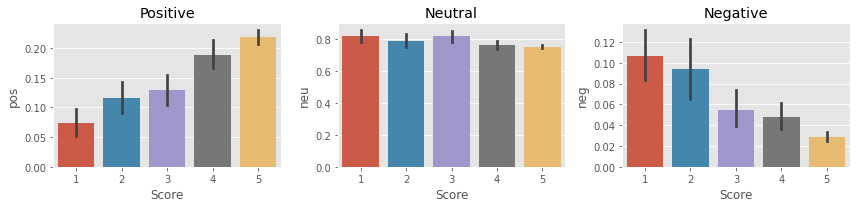

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

RoBERTa Model

In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification #classify sequences of tokens into one or more classes
from scipy.special import softmax #convert the model's output scores for different classes into probabilities.

In [20]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment" #trained on twitter comments
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)


## Run Model

In [21]:
encoded_text=tokenizer(ex, return_tensors='pt') #return_tensors='pt' specifies that the output should be in PyTorch tensor format
output=model(**encoded_text) #**encoded_text syntax is used to unpack the dictionary and pass its contents as arguments
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.6704, -0.3174,  3.6285]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [22]:
print(ex)

We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much.


In [23]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0], #negative
    'roberta_neu' : scores[1], #neutral
    'roberta_pos' : scores[2] #positive scores for example text
}
print(scores_dict) 

{'roberta_neg': 0.0018000891, 'roberta_neu': 0.018932313, 'roberta_pos': 0.97926766}


Function to run it on every line

In [24]:
def roberta_polarity_scores(ex):
    encoded_text=tokenizer(ex, return_tensors='pt')
    output=model(** encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0], #negative
    'roberta_neu' : scores[1], #neutral
    'roberta_pos' : scores[2]} #positive scores for example text
    return scores_dict


    

merging both



In [25]:
res={}
for i, row in tqdm(df.iterrows(),total=len(df)):
    try:
        text=row['Text']
        myid=row['Id']
        roberta_result=roberta_polarity_scores(text)
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

    

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


Iterate the function on entire dataset

In [26]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [27]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

sentiment highlighted as negative but they are 5 star

In [28]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [29]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

same results for both

In [30]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0] #sarcastic comment classified positive but score=1

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [31]:

results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0] 

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

# Comparision of the 2 models

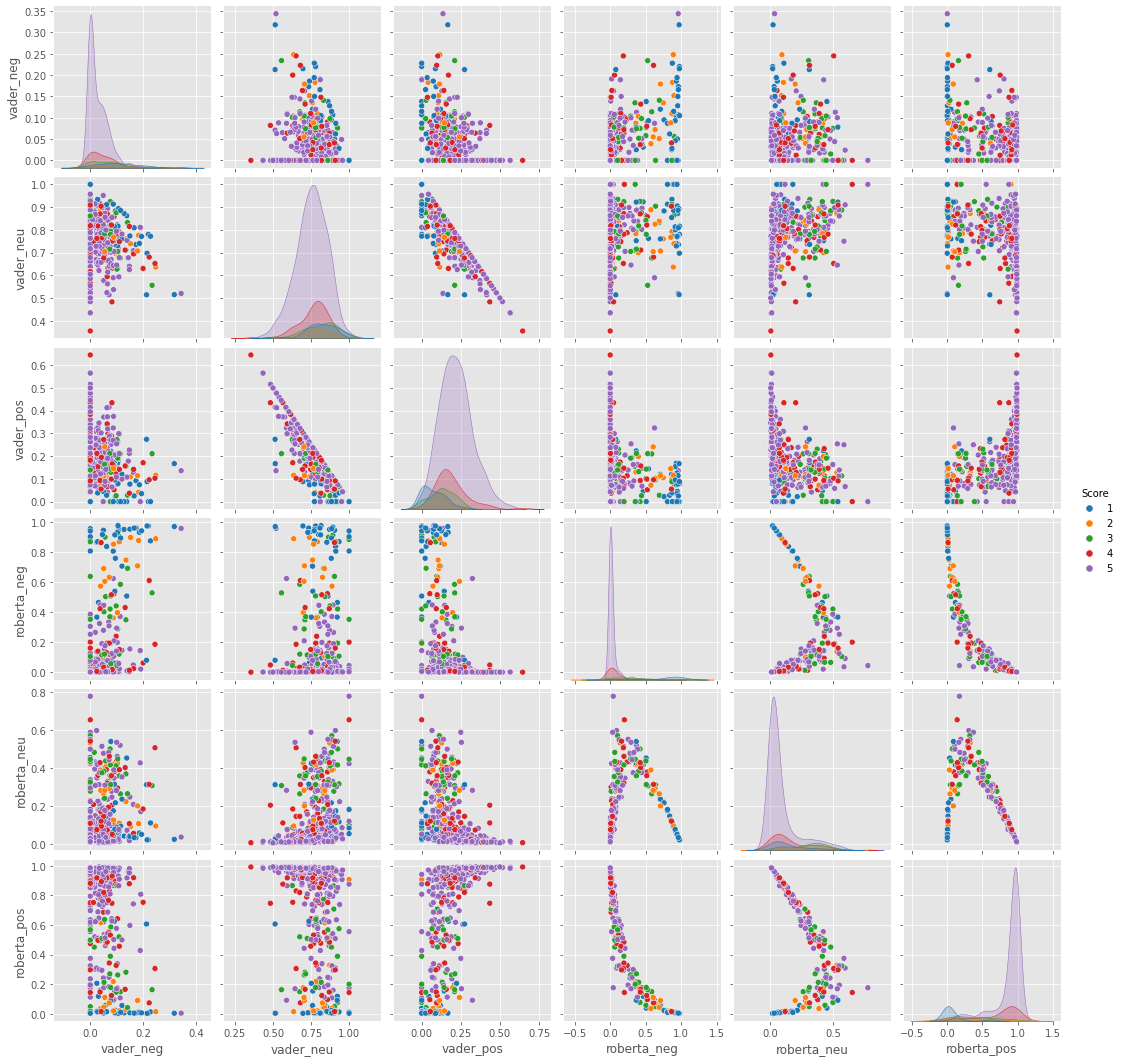

In [32]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()